In [122]:
%matplotlib inline

In [123]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from numpy import linalg

from sklearn.decomposition import PCA

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D

# Principal Component Analysis - Easy Tutorial with Demos


The goal of this document is to explain the technique of Principal Component Analysis in an easy and beginner-friendly way. As an added bonus, you will get to revisist some of linear algebra's key notions, such as matrices, eigenvalues, egenvectors, linear equations and linear transformation. The tutorial also covers in parallel the math and python code to do PCA. You should not that some math notions were not explained in detail as the turotial is targeted to beginners.


### What is PCA?

**Principal Component Analysis (PCA)** is a linear dimensionality reduction technique that can be utilized for extracting information from a high-dimensional space by projecting it into a lower-dimensional sub-space. It tries to preserve the essential parts that have more variation of the data and remove the non-essential parts with fewer variation. It works by transforming the original features into a new set of uncorrelated features called *principal components*, which capture most of the variability in the data.

![](PCA.webp)

PCA is centered on identifying the primary directions of **maximum variance** within the data. These high-variance directions typically signify the signal, while low-variance directions tend to reflect noise. By retaining the most significant principal components, PCA can filter out noise and highlight the underlying patterns in the data. 

PCA falls in the unsupervised branch of machine learning which uses **orthogonal linear transformation** based on the eigenvector and eigenvalue decomposition of the covariance matrix [[1](https://www.datacamp.com/tutorial/principal-component-analysis-in-python)][[2](https://medium.com/@niranjan.appaji/addressing-the-curse-of-dimensionality-unveiling-pcas-power-247956bc9a4d#:~:text=The%20curse%20of%20dimensionality%20refers,as%20we%20add%20more%20dimensions.)][[3](https://medium.com/codex/principle-component-analysis-pca-simplified-with-implementation-a05eb86084f8)].


PCA will be more useful when the variables are strongly correlated because the combined variable will then contain more information of the variables, compared to if the variables show a weak correlation to each other [[4](https://www.youtube.com/watch?v=dz8imS1vwIM)]

#### Why is PCA useful?

PCA is useful for reducing the dimensionality of the data while retaining as much information as possible. Reducing dimensionality can lead to simpler models, reduced computational complexity, and improved generalization to new, unseen data. In addition, utilizing a model trained on a reduced set of principal components typically demands fewer computational resources and less time, leading to enhanced overall model performace.


**The curse of dimensionality** refers to the increasing amount of data required to effectively fill space as the number of dimensions grows. For exmple, eight points may fill a one-dimensional space well, but their distance from each other becomes more noticeable as we add more dimensions. In a 10 or more dimensional space, these points would be even more widely dispersed.





![](dimensionsionality.jpg)


Selecting inputs, which involves reducing the number of inputs, is an evident strategy to counteract the curse of dimensionality. However, diminishing the dimensionality is also a straightforward method to overlook crucial inform The main rationale for excluding a variable is its redundancy, specifically, the presence of multicollinearity among variables. [[2](https://medium.com/@niranjan.appaji/addressing-the-curse-of-dimensionality-unveiling-pcas-power-247956bc9a4d#:~:text=The%20curse%20of%20dimensionality%20refers,as%20we%20add%20more%20dimensions.)]

### Eigenvalue Decomposition PCA Demo

We can summarize the **basic steps** of PCA with eigenvalue decomposition as follows:

1. **Standardization of data**
   
2. **Computation of Covariance Matrix**
   
3. **Calculation of Eigenvector and Eigenvalue**

4. **Selection of number of Principal Components**
   
5. **Multiplication of principal components with original data to create the newly transformed dataset.**

Let's demonstrate the technique on a simple synthetic dataset that presents a correlation between *salary* and *expenses*. We will generate the dataset as a *NumPy array* and then create a *DataFrame* using *Pandas*:

In [124]:
# Creating a dummy dataset
data = np.array([[1000, 500],[2000, 800],[3000, 1100],[4000, 1500],[5000,1800],[8000, 1900]])
# Creating a dataframe
df = pd.DataFrame(data,columns = ['Salary','Expenses'])

In [125]:
df

,Salary,Expenses
0,1000,500
1,2000,800
2,3000,1100
3,4000,1500
4,5000,1800
5,8000,1900


Let's visualize the dataset by a scatterplot using a regression line to show the **correlation** using *Seaborn*:

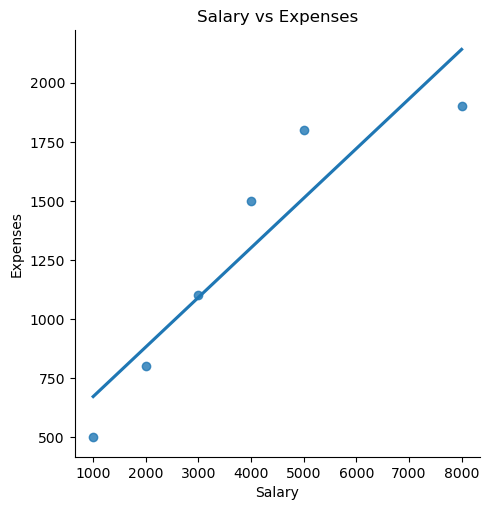

In [126]:
# Create a scatter plot with a regression line to show the correlation
plot = sns.lmplot(x = 'Salary', y = 'Expenses', data = df, ci = None)
plt.title("Salary vs Expenses")
plt.xlabel('Salary')
plt.ylabel('Expenses')
plt.show()

We can see that out two variable seem to be strongly correlated. Now we can proceed with the first step:

#### 1. Standardization of data

As PCA will calculate a new projection of our dataset in which the new axes are based on the standard deviation of our variables, a variable with a high standard deviation will have a higher weight for the calculation of the axes than a variable with a low standard deviation. This is the reason why we need to standardize the data.

To standardize a variable, we subtract the corresponding mean from all values of the variable, which will result in centered data. Then we divide the centered data by the standard deviation of the corresponding variable, which will give us the standardized variable: 

$$ z = \frac{x - \mu}{\sigma}$$

By standardizing the variables, we have transformed them to have a mean ($\mu$) of 0 and a standard deviation ($\sigma$) of 1. 

We will code this following the math implementaion, while standardization is usully done using *StandardScaler*, *RobustScaler*, or *MinMaxScaler* of the sklearn library.

In [127]:
# Calculate the mean of each column
mean_salary = df['Salary'].mean()
mean_expense = df['Expenses'].mean()

# Calculate the standard deviation of each column
std_salary = df['Salary'].std()
std_expense = df['Expenses'].std()

# Standardize the columns and rename them
df['Salary Standardized'] = (df['Salary'] - mean_salary) / std_salary
df['Expenses Standardized'] = (df['Expenses'] - mean_expense) / std_expense

standardized_data = df[['Salary Standardized', 'Expenses Standardized']].to_numpy()

In [128]:
df

,Salary,Expenses,Salary Standardized,Expenses Standardized
0,1000,500,-1.140965,-1.366725
1,2000,800,-0.738272,-0.831920
2,3000,1100,-0.335578,-0.297114
3,4000,1500,0.067116,0.415960
4,5000,1800,0.469809,0.950765
5,8000,1900,1.677890,1.129034


Let's visualise the standartized data which is centered around the center now:

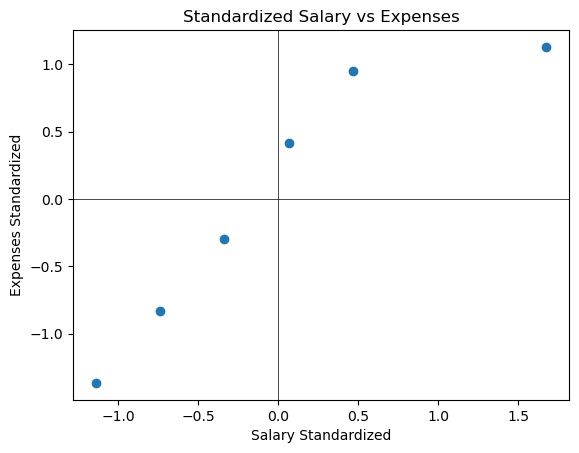

In [129]:
# Create a scatter plot of the standardized data
plt.scatter(df['Salary Standardized'], df['Expenses Standardized'])

# Plot the main axes
plt.axhline(0, color='black', linewidth=0.5) 
plt.axvline(0, color='black', linewidth=0.5) 

plt.title("Standardized Salary vs Expenses")
plt.xlabel('Salary Standardized')
plt.ylabel('Expenses Standardized')
plt.show()


#### 2. Computation of Covariance Matrix

The **covariance matrix** is a square matrix that displays the variance exhibited by elements of datasets and the covariance between a pair of datasets. It is also known as the **variance-covariance matrix** because the variance of each element is represented along the matrix’s major diagonal and the covariance is represented among the non-diagonal elements. **Variance** is a measure of dispersion and can be defined as the spread of data from the mean of the given dataset. **Covariance** is calculated between two variables and is used to measure how the two variables spread together  [[4](https://www.youtube.com/watch?v=dz8imS1vwIM)][[5](https://www.cuemath.com/algebra/covariance-matrix/)][[6](https://www.geeksforgeeks.org/covariance-matrix/)].

For two variables $x$ and $y$, the covariance matrix $\sum$ is:

$$ \sum = \begin{bmatrix}
\text{Var}(x) & \text{Cov}(x, y) \\
\text{Cov}(y, x) & \text{Var}(y)
\end{bmatrix} $$

Here are the formulas for variance and covariance:

$$ \text{Var}(x) = \sum_{i=1}^n \frac{(x_i -\bar{x})^2}{n - 1} $$

$$ \text{Cov}(x, y) = \sum_{i=1}^n \frac{(x_i - \bar{x})(y_i - \bar{y})}{n - 1} $$ 

We will use *NumPy* to make those calculations:

In [130]:
# Compute the covariance matrix
cov_matrix = np.cov(standardized_data[:,0], standardized_data[:,1])
print("Covariance Matrix:")
print(cov_matrix)

Covariance Matrix:
[[1.         0.92845287]
 [0.92845287 1.        ]]


In [131]:
standardized_data

array([[-1.14096529, -1.36672523],
       [-0.73827166, -0.8319197 ],
       [-0.33557803, -0.29711418],
       [ 0.06711561,  0.41595985],
       [ 0.46980924,  0.95076538],
       [ 1.67789014,  1.12903389]])

|                       | Salary Standardized | Expenses Standardized |
|-----------------------|:-------------------:|:---------------------:|
| Salary Standardized   |          1          |       0.92845287      |
| Expenses Standardized |      0.92845287     |           1           |\end{table}

Even though the variances on the diagonal are all 1 (due to standardization), the off-diagonal elements of the covariance matrix still represent the covariance between the pair of variables.

#### 3. Calculation of Eigenvectors and Eigenvalues

The **eigenvectors** of a linear transformation are those vectors that remain pointed in the **same directions** and occupy the **same span** after the transformation. For these vectors, the effect of the transform matrix is just scalar multiplication. For each eigenvector, the **eigenvalue** is the **scalar** that the eigenvector is scaled by under the transformation. The eigenvalues therefore represent the spread of the data in the direction of the eigenvectors. 

An eigenvector $v$ of a matrix $A$ is a non-zero vector that satisfies the equation below. The requirement is that when we multiply a square matrix $A$ by such a vector $v$, the result should be a number $\lambda$ times the old vector. The number $\lambda$ is the eigenvalue: 

$$ Av = \lambda v $$

Dimensionality reduction by means of PCA is accomplished by projecting the data onto the largest eigenvectors of its covariance matrix. The **principal components** are obtained by the **eigendecomposition of the covariance matrix** of our data. If we have a 2 x 2 matrix $A$, we are going to have 2 eigenvalues ($\lambda_1, \lambda_2$), obtained by solving the equation given in the expression below:

$$(A - \lambda I)v = 0 $$

Where $I$ is the **identity matrix**, with a size corresponding to $A$. An identity matrix is a **square matrix** whose main diagonal is equal to only ones and zeros elsewhere:

$$ I = \begin{bmatrix}
1 & 0 \\
0 & 1 
\end{bmatrix} $$

Generally speaking, multiplying a matrix by an identity matrix results in the same matrix. Myltiplying by an identity matrix is like multiplying by one [[4](https://www.youtube.com/watch?v=dz8imS1vwIM)][[6](https://towardsdatascience.com/eigen-intuitions-understanding-eigenvectors-and-eigenvalues-630e9ef1f719)][[7](https://online.stat.psu.edu/stat505/lesson/4/4.5)][[8](https://www.visiondummy.com/2014/05/feature-extraction-using-pca/)].

We will not go into details of the math of matrix multiplication, but the solution of the above equation includes finding the solution of a **polynomial equation**, a quadratic equation in our case, which should have a determinant equal to zero:

$$ \det(A - \lambda I) = \det\begin{pmatrix}
1 - \lambda & 0.92845287 \\
0.92845287 & 1 - \lambda
\end{pmatrix} = 0$$

We can plot how the left side of this equation changes as a function of $\lambda$ and we will see the eigenvalues as points on the $x$ (zero $y$), where the function intersects $x$.

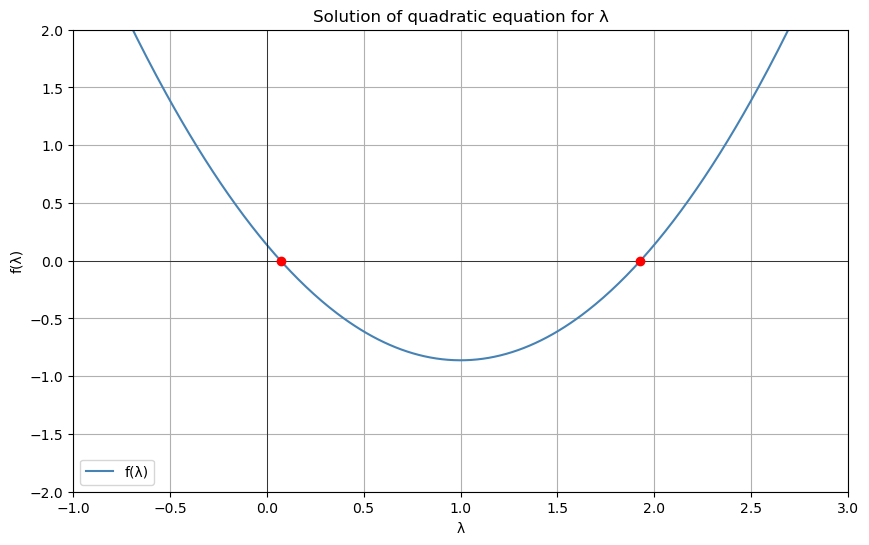

In [132]:
# Define the range of lambda values
lambda_values = np.linspace(-1, 3, 400)  # 400 points between 0 and 2

# Compute the determinant of A - lambda*I for each lambda
det_values = []
for lambda_val in lambda_values:
    matrix = cov_matrix - lambda_val * np.eye(2)
    det = np.linalg.det(matrix)
    det_values.append(det)

# Plot the determinant as a function of lambda
plt.figure(figsize = (10, 6))
plt.plot(lambda_values, det_values, label = 'f(λ)', color = 'steelblue')
plt.axhline(0, color = 'black', linewidth = 0.5)
plt.axvline(0, color = 'black', linewidth = 0.5)

# Highlight the eigenvalues
plt.plot(1.92845287, 0,'ro') 
plt.plot(0.07154713, 0,'ro') 

plt.title('Solution of quadratic equation for λ')
plt.xlabel('λ')
plt.ylabel('f(λ)')
plt.grid(True)
plt.legend()
plt.ylim([-2, 2])  
plt.xlim([-1, 3]) 
plt.show()

Let's compute the eigenvalues and eigenvectors for our demo using *NumPy* and its *linear algebra* features:

In [133]:
# Calculate eigenvalues and eigenvectors
cov_matrix = np.array([[1.0, 0.92845287],
[0.92845287, 1.0]])
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

print("\nEigenvalues:")
print(eigenvalues)

print("\nEigenvectors:")
print(eigenvectors)


Eigenvalues:
[1.92845287 0.07154713]

Eigenvectors:
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


Now let's have the same plot with our data this time with both eigenvectors.

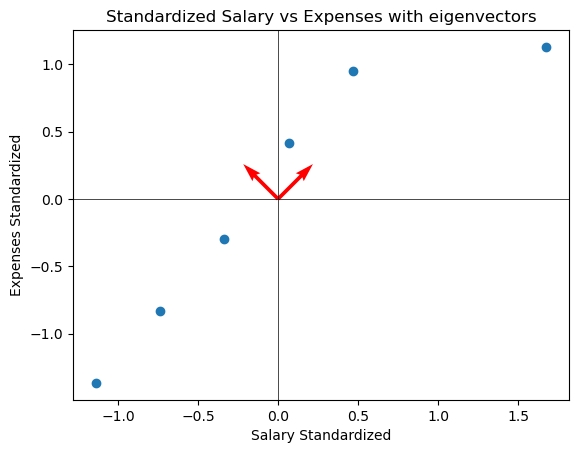

In [134]:
# Create a scatter plot of the standardized data
plt.scatter(df['Salary Standardized'], df['Expenses Standardized'])

plt.axhline(0, color='black', linewidth=0.5) 
plt.axvline(0, color='black', linewidth=0.5) 
plt.quiver(0.70710678, 0.70710678, color=['r'], scale=3, scale_units='xy')
plt.quiver(-0.70710678, 0.70710678, color=['r'], scale=3, scale_units='xy')
plt.title("Standardized Salary vs Expenses with eigenvectors")
plt.xlabel('Salary Standardized')
plt.ylabel('Expenses Standardized')
plt.show()


The covariance matrix used in PCA is **symmetric** and this  why the eigenvectors are **orthogonal**. Orthogonality ensures that the principal components are uncorrelated and simplifies the transformation between different bases.


#### 4. Selection of number of Principal Components

The different columns of the eigenvector matrix depict different eigenvectors. In our example we have only two, as our data is two-dimensional:

$$$$ \begin{bmatrix}
0.70710678  \\
0.70710678 
\end{bmatrix} & 
\begin{bmatrix}
-0.70710678  \\
0.70710678 
\end{bmatrix}
$$$$

In general, for the PCA we will choose those eigenvectors that correspond to the highest eigenvalue to be our **principal components (PCs)**. PCA  assumes that the most interesting feature is the one with the largest variance or spread. This assumption is based on an information theoretic point of view, since the dimension with the largest variance corresponds to the dimension with the largest entropy and thus encodes the most information. The smallest eigenvectors will often simply represent noise components, whereas the largest eigenvectors often correspond to the principal components that define the data.

Specifically, they are three criteria to use when choosing which and how many eigenvectors to select as **PCs**:

* Select the smallest number of components that together hold about 80-90% of the total variance.
* •	Use the Kaiser criterion, where we retain components with a variance (eigenvalue) greater than the average of the eigenvalues.* 
•	Use a scree p A scree plot is a graph of eigenvalues against the corresponding PC number. The number of PCs retained is then subjectively determined by locating the point at which the graph shows a distinct change in the slope. For our simple data it is not suitable [[4](https://www.youtube.com/watch?v=dz8imS1vwIM)][[8](https://www.visiondummy.com/2014/05/feature-extraction-using-pca/)][[9](https://www.sciencedirect.com/topics/mathematics/scree-plot#:~:text=A%20scree%20plot%20is%20a,distinct%20change%20in%20the%20slope.)].o
Let's calculate how much variance each of our two PCs captures:ctor.

In [135]:
# Calculate the total variance
total_variance = eigenvalues.sum()

# Calculate variance explained by each principal component
var_exp_1 = eigenvalues[0] / total_variance
var_exp_2 = eigenvalues[1] / total_variance

# Print the results in percentages
print('Total variance explained by first principal component in percentage is', round(var_exp_1 * 100, 2),'%')
print('Total variance explained by second principal component in percentage is', round(var_exp_2 * 100, 2),'%')

Total variance explained by first principal component in percentage is 96.42 %
Total variance explained by second principal component in percentage is 3.58 %


In our easy example we can see that the **first principal component (PC1)** accounts for 96% of all varaince. This means that we can reduce our two-dimensional data to one dimension lossing only 4% of its varaince.

#### 5. Multiplication of principal components with original data to create the newly transformed dataset

Now with the help of our **PC1**, we will project the data from the original axes into **principal component axes**. We will multiply **PC1** with original standardized data and obtain new transformed features. 

In [136]:
#multiply the original data with the eigen vector
final_data = np.dot(standardized_data, np.array(eigenvectors[1]))
print(final_data)

[-1.77320497 -1.11029296 -0.44738095  0.34158593  1.00449794  1.98479501]


Let's visualise the final data, which is also referred to as the **scores**. Our data is now one-dimensional:

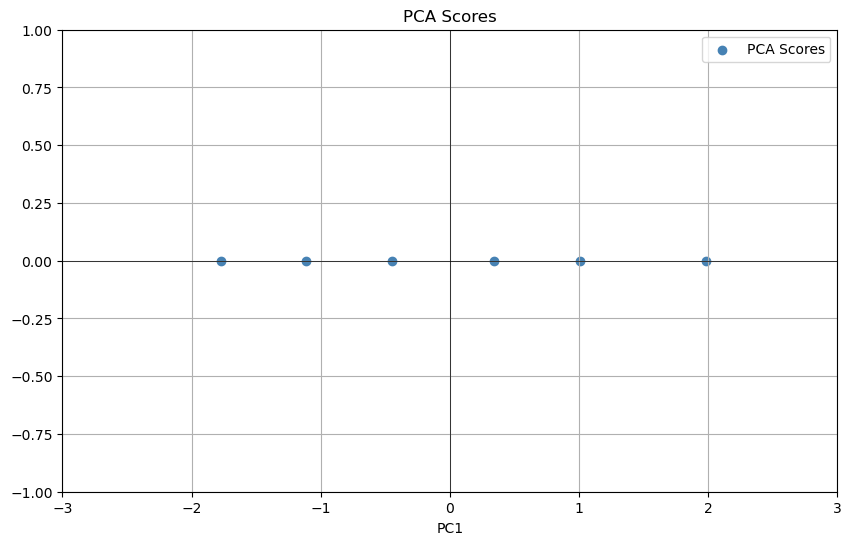

In [137]:
# Plot the one-dimensional PCA scores
plt.figure(figsize=(10, 6))
plt.scatter(final_data, np.zeros_like(final_data), label = 'PCA Scores', color = 'steelblue')

plt.xlim(-3, 3)
plt.ylim(-1, 1)

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title("PCA Scores")
plt.xlabel('PC1')
plt.legend()
plt.grid(True)
plt.show()

We now have the one-dimension data we initially set on to achieve which holds almost all of the data variance. Let's verify our data with PCA calculations done by sklearn.decomposition.PCA which use **Singular Value Decomposition (SVD)**. The steps of SVD differs from those of **eigenvalue decompositon (EIG)** in the part involving the covariance matrix, as SVD calculates PCA on the data matrix directly, with no need for a covariance matrix. 

Mathematically, there is no difference whether PCA is calculated on the data matrix directly (SVD) or on its covariance matrix (EIG). 
The difference is purely due to numerical precision and complexityEIGon has a complexity o$f O ^(n$³), the SVD is generally faster in practice. Moreover, it does not involve calculating the covariance matrix, which makes the SVD numerically more stabl

In addition, PCA can be thought of as fitting a $p$-dimensional **ellipsoid** to the data, where each axis of the ellipsoid represents a principal component. If some axis of the ellipsoid is small, then the variance along that axis is also small.e.[[10](https://harjot-dadhwal.medium.com/why-should-you-prefer-svd-over-eig-while-performing-linear-principal-component-analysis-36a84db3ba4b#:~:text=The%20eigen%20decomposition%20has%20a,the%20SVD%20numerically%20more%20stable.)][[11](https://en.wikipedia.org/wiki/Principal_component_analysis)]
D.



In [138]:
# Perform PCA with one principal component
pca = PCA(n_components = 1)
pca.fit(standardized_data)

# Calculate explained variance ratio 
explained_variance_ratio_percentage = pca.explained_variance_ratio_[0] * 100

# Print the explained variance in percentage
print("Variance explained by principal component is", round(explained_variance_ratio_percentage, 2), '%')

# Transform the standardized data
transformed_data = pca.transform(standardized_data)
print("Scores:\n", transformed_data)

Variance explained by principal component is 96.42 %
Scores:
 [[-1.77320497]
 [-1.11029296]
 [-0.44738095]
 [ 0.34158593]
 [ 1.00449794]
 [ 1.98479501]]


**Success!** The figures match compeltely. 

As we now know how PCA works, lets reward ourselves using it with a different data set, which is also a training set, but has more dimensions.

### Iris Dataset Demo

The Iris flower data set or **Fisher's Iris** data set was used and made famous by the British statistician and biologist Ronald Fisher in his 1936 paper titled *The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis*. It has 150 rows, with four features, petal length and width, and sepal length and width. There are three spieces: Iris setosa, Iris Versicolor, and Iris virginica. Here is what they are:

![](iris_pic.webp)

https://en.wikipedia.org/wiki/Iris_flower_data_set
https://medium.com/swlh/an-intuitive-approach-to-pca-fc4d05c14c19
p)

We will now apply the PCA technique, but before that lets take a look at the data.


In [81]:
dataset = load_iris()
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
target = 'species'
iris = pd.DataFrame(dataset.data, columns = features)
iris[target] = dataset.target

In [82]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Let's plot the petal and sepal features:

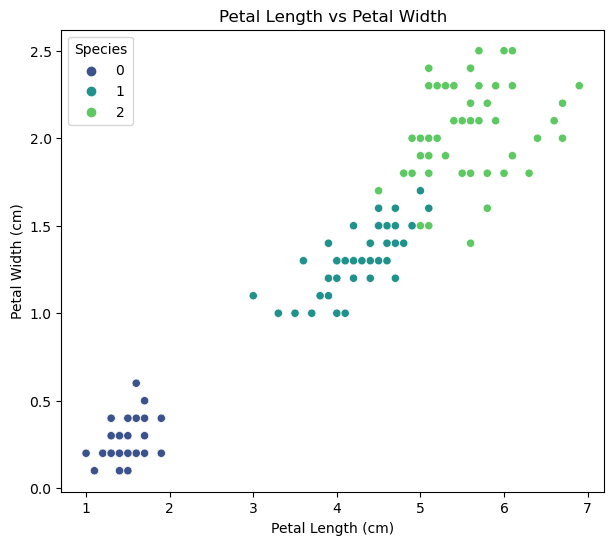

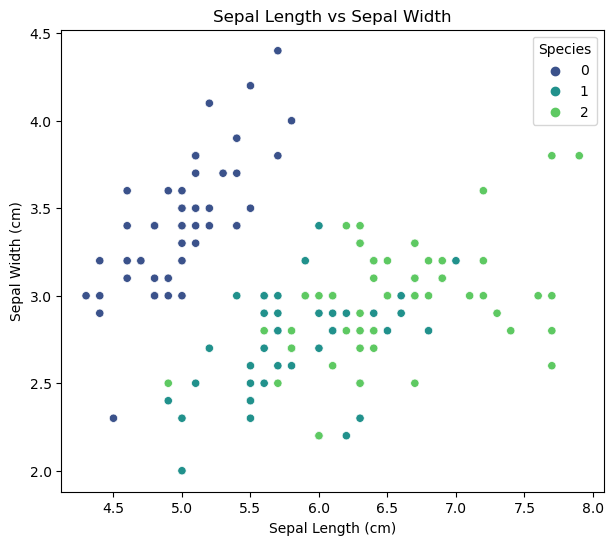

In [140]:
# Define a color palette for the species
palette = sns.color_palette("viridis", len(iris[target].unique()))

# Plot Petal Length vs Petal Width
plt.figure(figsize=(7, 6))
sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species', palette=palette)
plt.title('Petal Length vs Petal Width')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend(title='Species')
plt.show()

# Plot Sepal Length vs Sepal Width
plt.figure(figsize=(7, 6))
sns.scatterplot(data=iris, x='sepal_length', y='sepal_width', hue='species', palette=palette)
plt.title('Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title='Species')
plt.show()

The clusters are extremely easy to see, even with the data not being preprocessing. 

The final step is to apply PCA and plot the scores. We will reduce the 4-dimensional data to 3, 2 and finally 1 dimension.

https://github.com/olekscode/Examples-PCA-tSNE/blob/master/Python/Visualizing%20Iris%20Dataset%20using%20PCA%20and%20t-SNE.ipynb


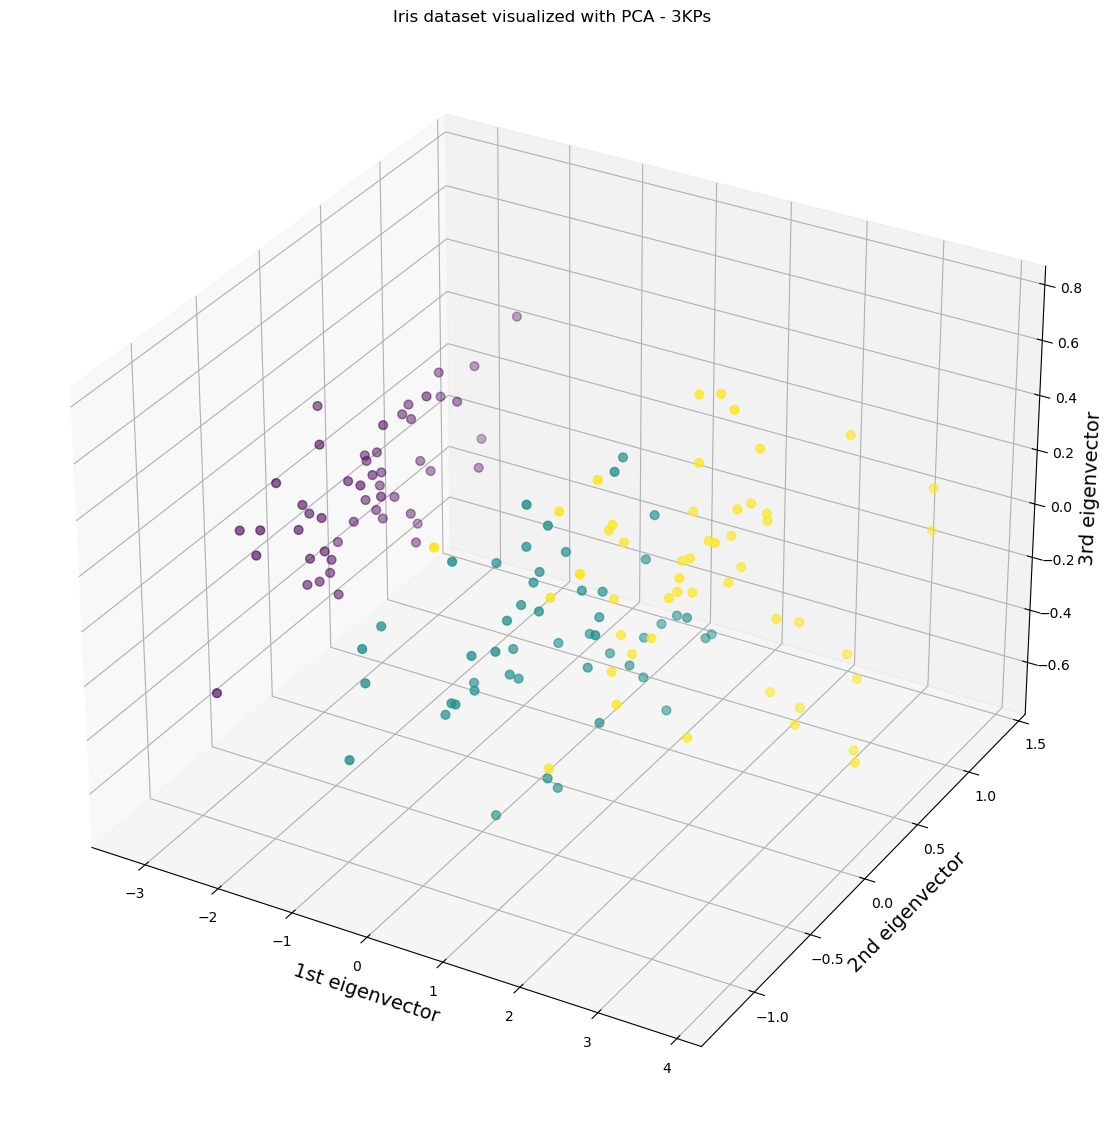

Variance explained by each principal component for 3 components:
KP1: 92.46%
KP2: 5.31%
KP3: 1.71%


In [116]:
# Define a 3D plotting function
def plot_3d(x, y, z):
    fig = plt.figure(figsize = (14, 72))
    ax = fig.add_subplot(111, projection = '3d')
    ax.scatter(x, y, z, c = iris['species'], cmap = 'viridis', s = 40)
    ax.set_title('Iris dataset visualized with PCA - 3KPs')
    ax.set_xlabel('1st eigenvector', fontsize = 14)
    ax.set_ylabel('2nd eigenvector', fontsize = 14)
    ax.set_zlabel('3rd eigenvector', fontsize = 14)
    plt.show()

# Perform PCA with 3 components
pca = PCA(n_components = 3)
points = pca.fit_transform(iris[features])

# Plot in 3D
plot_3d(x = points[:, 0], y = points[:, 1], z = points[:, 2])

# Print variance explained by each principal component
print("Variance explained by each principal component for 3 components:")
for i in range(3):
    print(f"KP{i+1}: {pca.explained_variance_ratio_[i]*100:.2f}%")

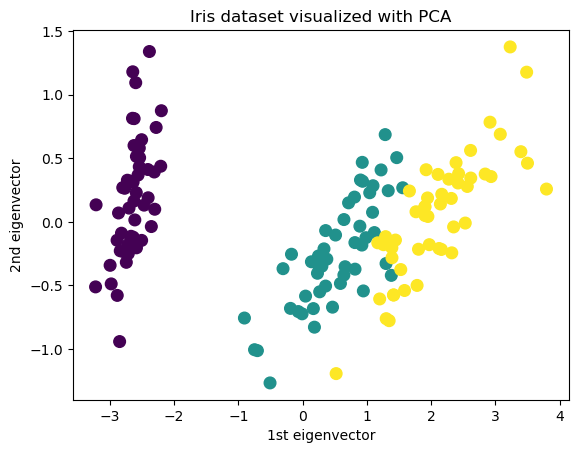

In [106]:
# Define a 2D plotting function
def plot_2d(x, y, xlabel = 'KP1', ylabel = 'KP2'):
    plt.scatter(x, y, c = iris['species'], cmap = 'viridis', s = 70)
    plt.title('Iris dataset visualized with PCA - 2KPs')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Perform PCA with 2 components
pca = PCA(n_components = 2)
points = pca.fit_transform(iris[features])

# Plot in 2D
plot_2d(x = points[:, 0], y = points[:, 1])

variance_explained = np.sum(pca.explained_variance_ratio_)

# Print variance explained for each dimension
print(f"Variance explained by {n} components: {variance_explained[-1]}")

The parameter n_components allows us to select how many principle components we want to reduce our features to, in the above case - 2. Even though our data was by half, we still have two principle components which contain the majority of the statistical variance in the original data, and clustering or classification would still be an easy task. 

When we reduce all four components to just one, throwing out a massive 75% of our original data we will have preserved 92.46% of the original data:

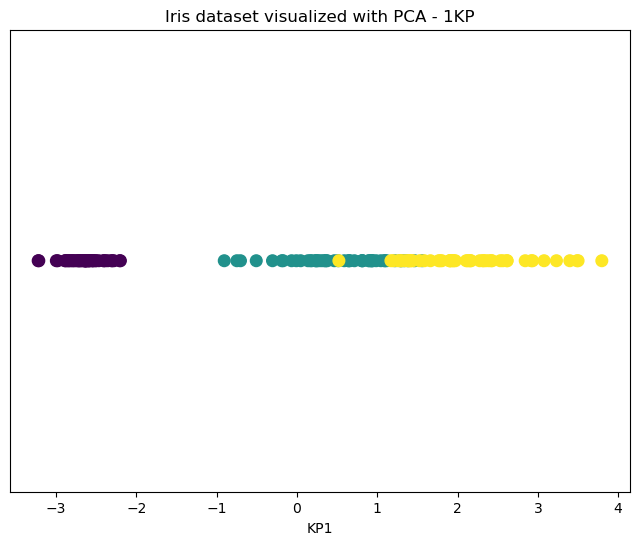

In [118]:
# Perform PCA with 1 component
pca = PCA(n_components = 1)
points = pca.fit_transform(iris[features])

# Plotting function for 1D
def plot_1d(x):
    plt.figure(figsize=(8, 6))
    plt.scatter(x, np.zeros_like(x), c = iris['species'], cmap='viridis', s=70)
    plt.title('Iris dataset visualized with PCA - 1KP')
    plt.xlabel('KP1')
    plt.yticks([])  # Remove y-axis ticks and labels
    plt.show()

# Plot in 1D
plot_1d(points)

### Final thoughts and PCA applications

It makes sense after we learned how PCA is done to list some applications as now it might be easier to make the connections. The principal application of PCA is **dimension reduction**. 


PCA is used abundantly in all forms of analysis - fro*n Neuroscien*ce t*q Quantitativf Finan*ceIn neuroscience, PCA is  also used to find the identity of a neuron from the shape of its action pot, among other applicationse In quantative finance, it is used to manage big matrices that contain different stocks. In image compression, PCA can reduce the number of pixels needed to represent an image while retaining most of its important features. PCA can be used to extract the most relevant features of facial images, enabling more efficient and accurate identification. In genetics, PCA is frequently used to analyze genomic data.  

https://iq.opengenus.org/applications-of-pca/
https://web.stanford.edu/~sakshamg/portfolio/PCA_genomes/


![](PCA_anim.gif)

 Component Analysis.